# About The Dataset

I crafted a custom dataset derived from ODI (One Day International) cricket matches, meticulously extracted and organized from the comprehensive cricketing data available on [cricsheet.org](https://cricsheet.org/).

This dataset encapsulates detailed information such as bowler's name, team, innings, runs, balls, wickets, extras, average, strike_rate, economy, and wicket hauls, providing a rich resource for in-depth analysis and insights to predict the bowler, who will be the leading wicket taker in ICC Mens World Cup 2023.


## Feature Description:

1. **Name:** Name of the Bowler
2. **Team:** Name of Bowler's team
3. **Innings:** Number of innings in which player bowled
4. **Runs:** Total runs conceeded by bowler
5. **Balls:** No. of balls
6. **Wicket:** Total wickets taken
7. **Extras:** Total Extra runs conceeded
8. **Average:** Runs given per wicket taken
9. **Strike Rate:** Balls bowled per wicket taken
10. **Economy:** Average runs given per over
11. **Wicket Hauls:** No. of 5 or more wickets taken in a match

### Let's look at the dataset


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_csv("drive/My Drive/Bowlers.csv")
new_df = pd.read_csv("drive/My Drive/matchwise_details.csv")

In [30]:
df.sample(6)

,Name,team,innings,runs,balls,wickets,extras,average,strike_rate,economy,wicket_hauls
83,Noor Ahmad,Afghanistan,4,184,240,5,20,15.916667,25.083333,4.591943,0
17,RE van der Merwe,Netherlands,7,262,279,6,7,21.333333,22.166667,5.932120,0
70,T Shamsi,South Africa,3,170,178,7,11,35.333333,35.750000,5.639430,1
56,JR Hazlewood,Australia,8,367,421,13,23,31.187500,34.562500,5.200524,0
6,CR Woakes,England,7,275,304,10,16,13.357143,17.797619,5.731365,1
48,G Coetzee,South Africa,7,358,337,18,23,24.166667,22.047619,6.593401,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          98 non-null     object 
 1   team          98 non-null     object 
 2   innings       98 non-null     int64  
 3   runs          98 non-null     int64  
 4   balls         98 non-null     int64  
 5   wickets       98 non-null     int64  
 6   extras        98 non-null     int64  
 7   average       98 non-null     float64
 8   strike_rate   98 non-null     float64
 9   economy       98 non-null     float64
 10  wicket_hauls  98 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 8.5+ KB


In [32]:
df.describe()

,innings,runs,balls,wickets,extras,average,strike_rate,economy,wicket_hauls
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,5.112245,215.846939,230.397959,6.520408,10.571429,22.862693,24.150407,6.164453,0.275510
std,2.827999,140.087554,157.829070,5.574666,11.355547,17.207495,16.151674,1.554681,0.588211
min,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.392168,0.000000
25%,2.000000,88.750000,87.000000,2.000000,2.000000,10.347222,10.579861,5.297064,0.000000
50%,5.500000,203.500000,222.000000,5.500000,7.000000,23.496528,26.431796,5.858938,0.000000
75%,8.000000,345.000000,377.750000,10.750000,17.000000,32.449219,35.572266,6.563269,0.000000
max,9.000000,527.000000,531.000000,21.000000,59.000000,93.000000,64.000000,12.060606,3.000000


In [33]:
df.shape

(98, 11)

In [34]:
features = df.columns.to_list()
features

['Name',
 'team',
 'innings',
 'runs',
 'balls',
 'wickets',
 'extras',
 'average',
 'strike_rate',
 'economy',
 'wicket_hauls']

# 2. Data Cleaning

In [35]:
# Calculate the percentage of NaN and Non-NaN values for each feature
nan_percentage = (df.isna().mean() * 100).round(2)
non_nan_percentage = 100 - nan_percentage

# Create a DataFrame to display the results
nan_info_df = pd.DataFrame({'Feature': nan_percentage.index,
                           'NaN Percentage': nan_percentage.values, 'Non-NaN Percentage': non_nan_percentage.values})

# Sort the DataFrame by NaN Percentage in descending order
nan_info_df = nan_info_df.sort_values(by='NaN Percentage', ascending=False)

print(nan_info_df)

         Feature  NaN Percentage  Non-NaN Percentage
0           Name             0.0               100.0
1           team             0.0               100.0
2        innings             0.0               100.0
3           runs             0.0               100.0
4          balls             0.0               100.0
5        wickets             0.0               100.0
6         extras             0.0               100.0
7        average             0.0               100.0
8    strike_rate             0.0               100.0
9        economy             0.0               100.0
10  wicket_hauls             0.0               100.0


The above dataset needs to be updated. Adding data for matches Bangladesh vs Australia (11 Nov. 2023), England vs Pakistan (11 Nov. 2023) and India vs Netherlands (12 Nov. 2023).

In [36]:
data1 = {
    'Name': ['Taskin Ahmed', 'Mahedi Hasan', 'Nasum Ahmed', 'Mehedi Hasan Miraz', 'Mustafizur Rahman'],
    'Overs': [10.0, 9.0, 10.0, 6.0, 10.0],
    'Runs_Given': [61, 38, 85, 47, 76],
    'Wickets_Taken': [1, 0, 0, 0, 1]
}
data2 = {
    'Name': ['JR Hazlewood', 'PJ Cummins', 'Sean Abbott', 'MR Marsh', 'A Zampa', 'TM Head', 'MP Stoinis'],
    'Overs': [7.0, 8.0, 10.0, 4.0, 10.0, 6.0, 5.0],
    'Runs_Given': [21, 56, 61, 48, 32, 33, 45],
    'Wickets_Taken': [0, 0, 2, 0, 2, 0, 1]
}
data3 = {
    'Name': ['DJ Willey', 'CR Woakes', 'AU Rashid', 'AAP Atkinson', 'MM Ali'],
    'Overs': [10.0, 6, 10.0, 8.0, 10.0],
    'Runs_Given': [56, 27, 55, 45, 60],
    'Wickets_Taken': [3, 1, 2, 2, 2]
}
data4 = {
    'Name': ['Shaheen Shah Afridi', 'Haris Rauf', 'Iftikhar Ahmed', 'Mohammad Wasim', 'Shadab Khan', 'Agha Salman'],
    'Overs': [10.0, 10.0, 7.0, 10.0, 10.0, 3.0],
    'Runs_Given': [72, 64, 38, 74, 57, 25],
    'Wickets_Taken': [2, 3, 1, 2, 0, 0]
}
data5 = {
    'Name': ['JJ Bumrah', 'Mohammed Siraj', 'Mohammed Shami', 'Kuldeep Yadav', 'RA Jadeja', 'V Kohli', 'Shubman Gill', 'Suryakumar Yadav', 'Rohit Sharma'],
    'Overs': [9.0, 6.0, 6.0, 10.0, 9.0, 3.0, 2.0, 2.0, 1],
    'Runs_Given': [33, 29, 41, 41, 49, 13, 11, 17, 7],
    'Wickets_Taken': [2, 2, 0, 2, 2, 1, 0, 0, 1]
}
data6 = {
    'Name': ['A Dutt', 'LV van Beek', 'CN Ackermann', 'PA van Meekeren', 'RE van der Merwe', 'BFW de Leede'],
    'Overs': [7.0, 10.0, 3.0, 10.0, 10.0, 10.0],
    'Runs_Given': [52, 107, 25, 90, 53, 82],
    'Wickets_Taken': [0, 0, 0, 1, 1, 2]
}

In [37]:
new_matches = {
    'Name': data1['Name'] + data2['Name'] + data3['Name'] + data4['Name'] + data5['Name'] + data6['Name'],
    'Overs': data1['Overs'] + data2['Overs'] + data3['Overs'] + data4['Overs'] + data5['Overs'] + data6['Overs'],
    'runs': data1['Runs_Given'] + data2['Runs_Given'] + data3['Runs_Given'] + data4['Runs_Given'] + data5['Runs_Given'] + data6['Runs_Given'],
    'wickets': data1['Wickets_Taken'] + data2['Wickets_Taken'] + data3['Wickets_Taken'] + data4['Wickets_Taken'] + data5['Wickets_Taken'] + data6['Wickets_Taken']
}

# Display the merged data
print(new_matches)

{'Name': ['Taskin Ahmed', 'Mahedi Hasan', 'Nasum Ahmed', 'Mehedi Hasan Miraz', 'Mustafizur Rahman', 'JR Hazlewood', 'PJ Cummins', 'Sean Abbott', 'MR Marsh', 'A Zampa', 'TM Head', 'MP Stoinis', 'DJ Willey', 'CR Woakes', 'AU Rashid', 'AAP Atkinson', 'MM Ali', 'Shaheen Shah Afridi', 'Haris Rauf', 'Iftikhar Ahmed', 'Mohammad Wasim', 'Shadab Khan', 'Agha Salman', 'JJ Bumrah', 'Mohammed Siraj', 'Mohammed Shami', 'Kuldeep Yadav', 'RA Jadeja', 'V Kohli', 'Shubman Gill', 'Suryakumar Yadav', 'Rohit Sharma', 'A Dutt', 'LV van Beek', 'CN Ackermann', 'PA van Meekeren', 'RE van der Merwe', 'BFW de Leede'], 'Overs': [10.0, 9.0, 10.0, 6.0, 10.0, 7.0, 8.0, 10.0, 4.0, 10.0, 6.0, 5.0, 10.0, 6, 10.0, 8.0, 10.0, 10.0, 10.0, 7.0, 10.0, 10.0, 3.0, 9.0, 6.0, 6.0, 10.0, 9.0, 3.0, 2.0, 2.0, 1, 7.0, 10.0, 3.0, 10.0, 10.0, 10.0], 'runs': [61, 38, 85, 47, 76, 21, 56, 61, 48, 32, 33, 45, 56, 27, 55, 45, 60, 72, 64, 38, 74, 57, 25, 33, 29, 41, 41, 49, 13, 11, 17, 7, 52, 107, 25, 90, 53, 82], 'wickets': [1, 0, 0, 0, 

In [38]:
df_new_matches = pd.DataFrame(new_matches)
df_new_matches['balls'] = df_new_matches['Overs'] * 6
df_new_matches = df_new_matches.drop(['Overs'], axis=1)
df_new_matches


,Name,runs,wickets,balls
0,Taskin Ahmed,61,1,60.0
1,Mahedi Hasan,38,0,54.0
2,Nasum Ahmed,85,0,60.0
3,Mehedi Hasan Miraz,47,0,36.0
4,Mustafizur Rahman,76,1,60.0
5,JR Hazlewood,21,0,42.0
6,PJ Cummins,56,0,48.0
7,Sean Abbott,61,2,60.0
8,MR Marsh,48,0,24.0
9,A Zampa,32,2,60.0


In [39]:
df =df.sort_values(by='wickets', ascending=False)
df.head(10)

,Name,team,innings,runs,balls,wickets,extras,average,strike_rate,economy,wicket_hauls
39,D Madushanka,Sri Lanka,9,527,496,21,28,22.864583,22.290625,6.484366,2
60,A Zampa,Australia,8,387,422,20,12,23.437500,24.489583,5.296086,3
48,G Coetzee,South Africa,7,358,337,18,23,24.166667,22.047619,6.593401,1
45,M Jansen,South Africa,8,429,425,17,59,30.979167,28.354167,6.015438,0
20,Shaheen Shah Afridi,Pakistan,8,416,448,16,29,30.728571,33.538095,5.534755,1
2,MJ Santner,New Zealand,9,399,501,16,6,23.711111,34.246914,4.899798,1
82,Mohammed Shami,India,4,118,159,16,9,7.033333,9.875000,4.255000,3
0,TA Boult,New Zealand,9,420,503,15,20,29.264550,37.444444,5.031440,0
49,JJ Bumrah,India,8,236,398,15,18,17.452381,29.583333,3.392168,1
54,RA Jadeja,India,8,248,388,14,6,12.700000,22.646875,4.046231,1


In [40]:
merged_df = pd.merge(df, df_new_matches, on='Name', how='left', suffixes=('_original', '_new'))
merged_df['runs'] = merged_df['runs_new']+merged_df['runs_original']
merged_df['wickets'] = merged_df['wickets_new']+merged_df['wickets_original']
merged_df['balls'] = merged_df['balls_new']+merged_df['balls_original']

merged_df['runs'] = merged_df['runs'].fillna(merged_df['runs_original'])
merged_df['wickets'] = merged_df['wickets'].fillna(merged_df['wickets_original'])
merged_df['balls'] = merged_df['balls'].fillna(merged_df['balls_original'])

mask = merged_df['runs_new'].notna()
merged_df.loc[mask, 'innings'] = merged_df['innings']+1

merged_df = merged_df.drop(columns=['runs_original', 'balls_original','wickets_original', 'runs_new' ,'wickets_new', 'balls_new', 'average', 'strike_rate', 'economy'])

merged_df['average'] = merged_df['runs'] / merged_df['wickets']
merged_df['strike_rate'] = merged_df['balls'] / merged_df['wickets']
merged_df['economy'] = merged_df['runs']*6 / merged_df['balls']

merged_df = merged_df.sort_values(by='wickets', ascending=False)

merged_df.head(10)

,Name,team,innings,extras,wicket_hauls,runs,wickets,balls,average,strike_rate,economy
1,A Zampa,Australia,9,12,3,419.0,22.0,482.0,19.045455,21.909091,5.215768
0,D Madushanka,Sri Lanka,9,28,2,527.0,21.0,496.0,25.095238,23.619048,6.375000
2,G Coetzee,South Africa,7,23,1,358.0,18.0,337.0,19.888889,18.722222,6.373887
4,Shaheen Shah Afridi,Pakistan,9,29,1,488.0,18.0,508.0,27.111111,28.222222,5.763780
3,M Jansen,South Africa,8,59,0,429.0,17.0,425.0,25.235294,25.000000,6.056471
8,JJ Bumrah,India,9,18,1,269.0,17.0,452.0,15.823529,26.588235,3.570796
5,MJ Santner,New Zealand,9,6,1,399.0,16.0,501.0,24.937500,31.312500,4.778443
6,Mohammed Shami,India,5,9,3,159.0,16.0,195.0,9.937500,12.187500,4.892308
9,RA Jadeja,India,9,6,1,297.0,16.0,442.0,18.562500,27.625000,4.031674
10,AU Rashid,England,9,5,1,416.0,16.0,480.0,26.000000,30.000000,5.200000


In [41]:
selected_teams = ['India', 'New Zealand', 'South Africa', 'Australia']

In [42]:
selected_bowlers = merged_df[(merged_df['wickets'] > 8) & (merged_df['team'].isin(['India', 'New Zealand', 'Australia', 'South Africa']))]

selected_bowlers

,Name,team,innings,extras,wicket_hauls,runs,wickets,balls,average,strike_rate,economy
1,A Zampa,Australia,9,12,3,419.0,22.0,482.0,19.045455,21.909091,5.215768
2,G Coetzee,South Africa,7,23,1,358.0,18.0,337.0,19.888889,18.722222,6.373887
3,M Jansen,South Africa,8,59,0,429.0,17.0,425.0,25.235294,25.000000,6.056471
8,JJ Bumrah,India,9,18,1,269.0,17.0,452.0,15.823529,26.588235,3.570796
5,MJ Santner,New Zealand,9,6,1,399.0,16.0,501.0,24.937500,31.312500,4.778443
6,Mohammed Shami,India,5,9,3,159.0,16.0,195.0,9.937500,12.187500,4.892308
9,RA Jadeja,India,9,6,1,297.0,16.0,442.0,18.562500,27.625000,4.031674
7,TA Boult,New Zealand,9,20,0,420.0,15.0,503.0,28.000000,33.533333,5.009940
11,KA Maharaj,South Africa,9,12,1,346.0,14.0,482.0,24.714286,34.428571,4.307054
17,Kuldeep Yadav,India,9,7,0,315.0,14.0,455.0,22.500000,32.500000,4.153846


In [43]:
selected_bowlers_list = selected_bowlers['Name'].tolist()
selected_bowlers_list

['A Zampa',
 'G Coetzee',
 'M Jansen',
 'JJ Bumrah',
 'MJ Santner',
 'Mohammed Shami',
 'RA Jadeja',
 'TA Boult',
 'KA Maharaj',
 'Kuldeep Yadav',
 'JR Hazlewood',
 'K Rabada',
 'Mohammed Siraj',
 'MA Starc',
 'MJ Henry',
 'PJ Cummins',
 'L Ngidi',
 'LH Ferguson']

# 3. Visualization



In [44]:
# List of teams
teams = df['team'].unique()

# Dictionary of All Bowlers from each team
team_players = {}
for team in teams:
    player_list = df[df['team'] == team]['Name'].unique().tolist()
    team_players[team] = player_list
print(team_players, end=' ')

{'Sri Lanka': ['D Madushanka', 'CAK Rajitha', 'M Theekshana', 'AD Mathews', 'CBRLS Kumara', 'DN Wellalage', 'PVD Chameera', 'M Pathirana', 'MD Shanaka', 'DM de Silva', 'MADI Hemantha', 'KIC Asalanka', 'C Karunaratne'], 'Australia': ['A Zampa', 'JR Hazlewood', 'MA Starc', 'PJ Cummins', 'GJ Maxwell', 'MP Stoinis', 'MR Marsh', 'C Green', 'TM Head'], 'South Africa': ['G Coetzee', 'M Jansen', 'KA Maharaj', 'K Rabada', 'L Ngidi', 'T Shamsi', 'LB Williams', 'AL Phehlukwayo', 'AK Markram'], 'Pakistan': ['Shaheen Shah Afridi', 'Haris Rauf', 'Hasan Ali', 'Mohammad Wasim', 'Usama Mir', 'Mohammad Nawaz', 'Iftikhar Ahmed', 'Shadab Khan', 'Agha Salman'], 'New Zealand': ['MJ Santner', 'TA Boult', 'MJ Henry', 'LH Ferguson', 'GD Phillips', 'R Ravindra', 'TG Southee', 'JDS Neesham', 'IS Sodhi', 'DJ Mitchell'], 'India': ['Mohammed Shami', 'JJ Bumrah', 'RA Jadeja', 'Kuldeep Yadav', 'Mohammed Siraj', 'HH Pandya', 'SN Thakur', 'R Ashwin', 'V Kohli'], 'England': ['AU Rashid', 'CR Woakes', 'RJW Topley', 'DJ W

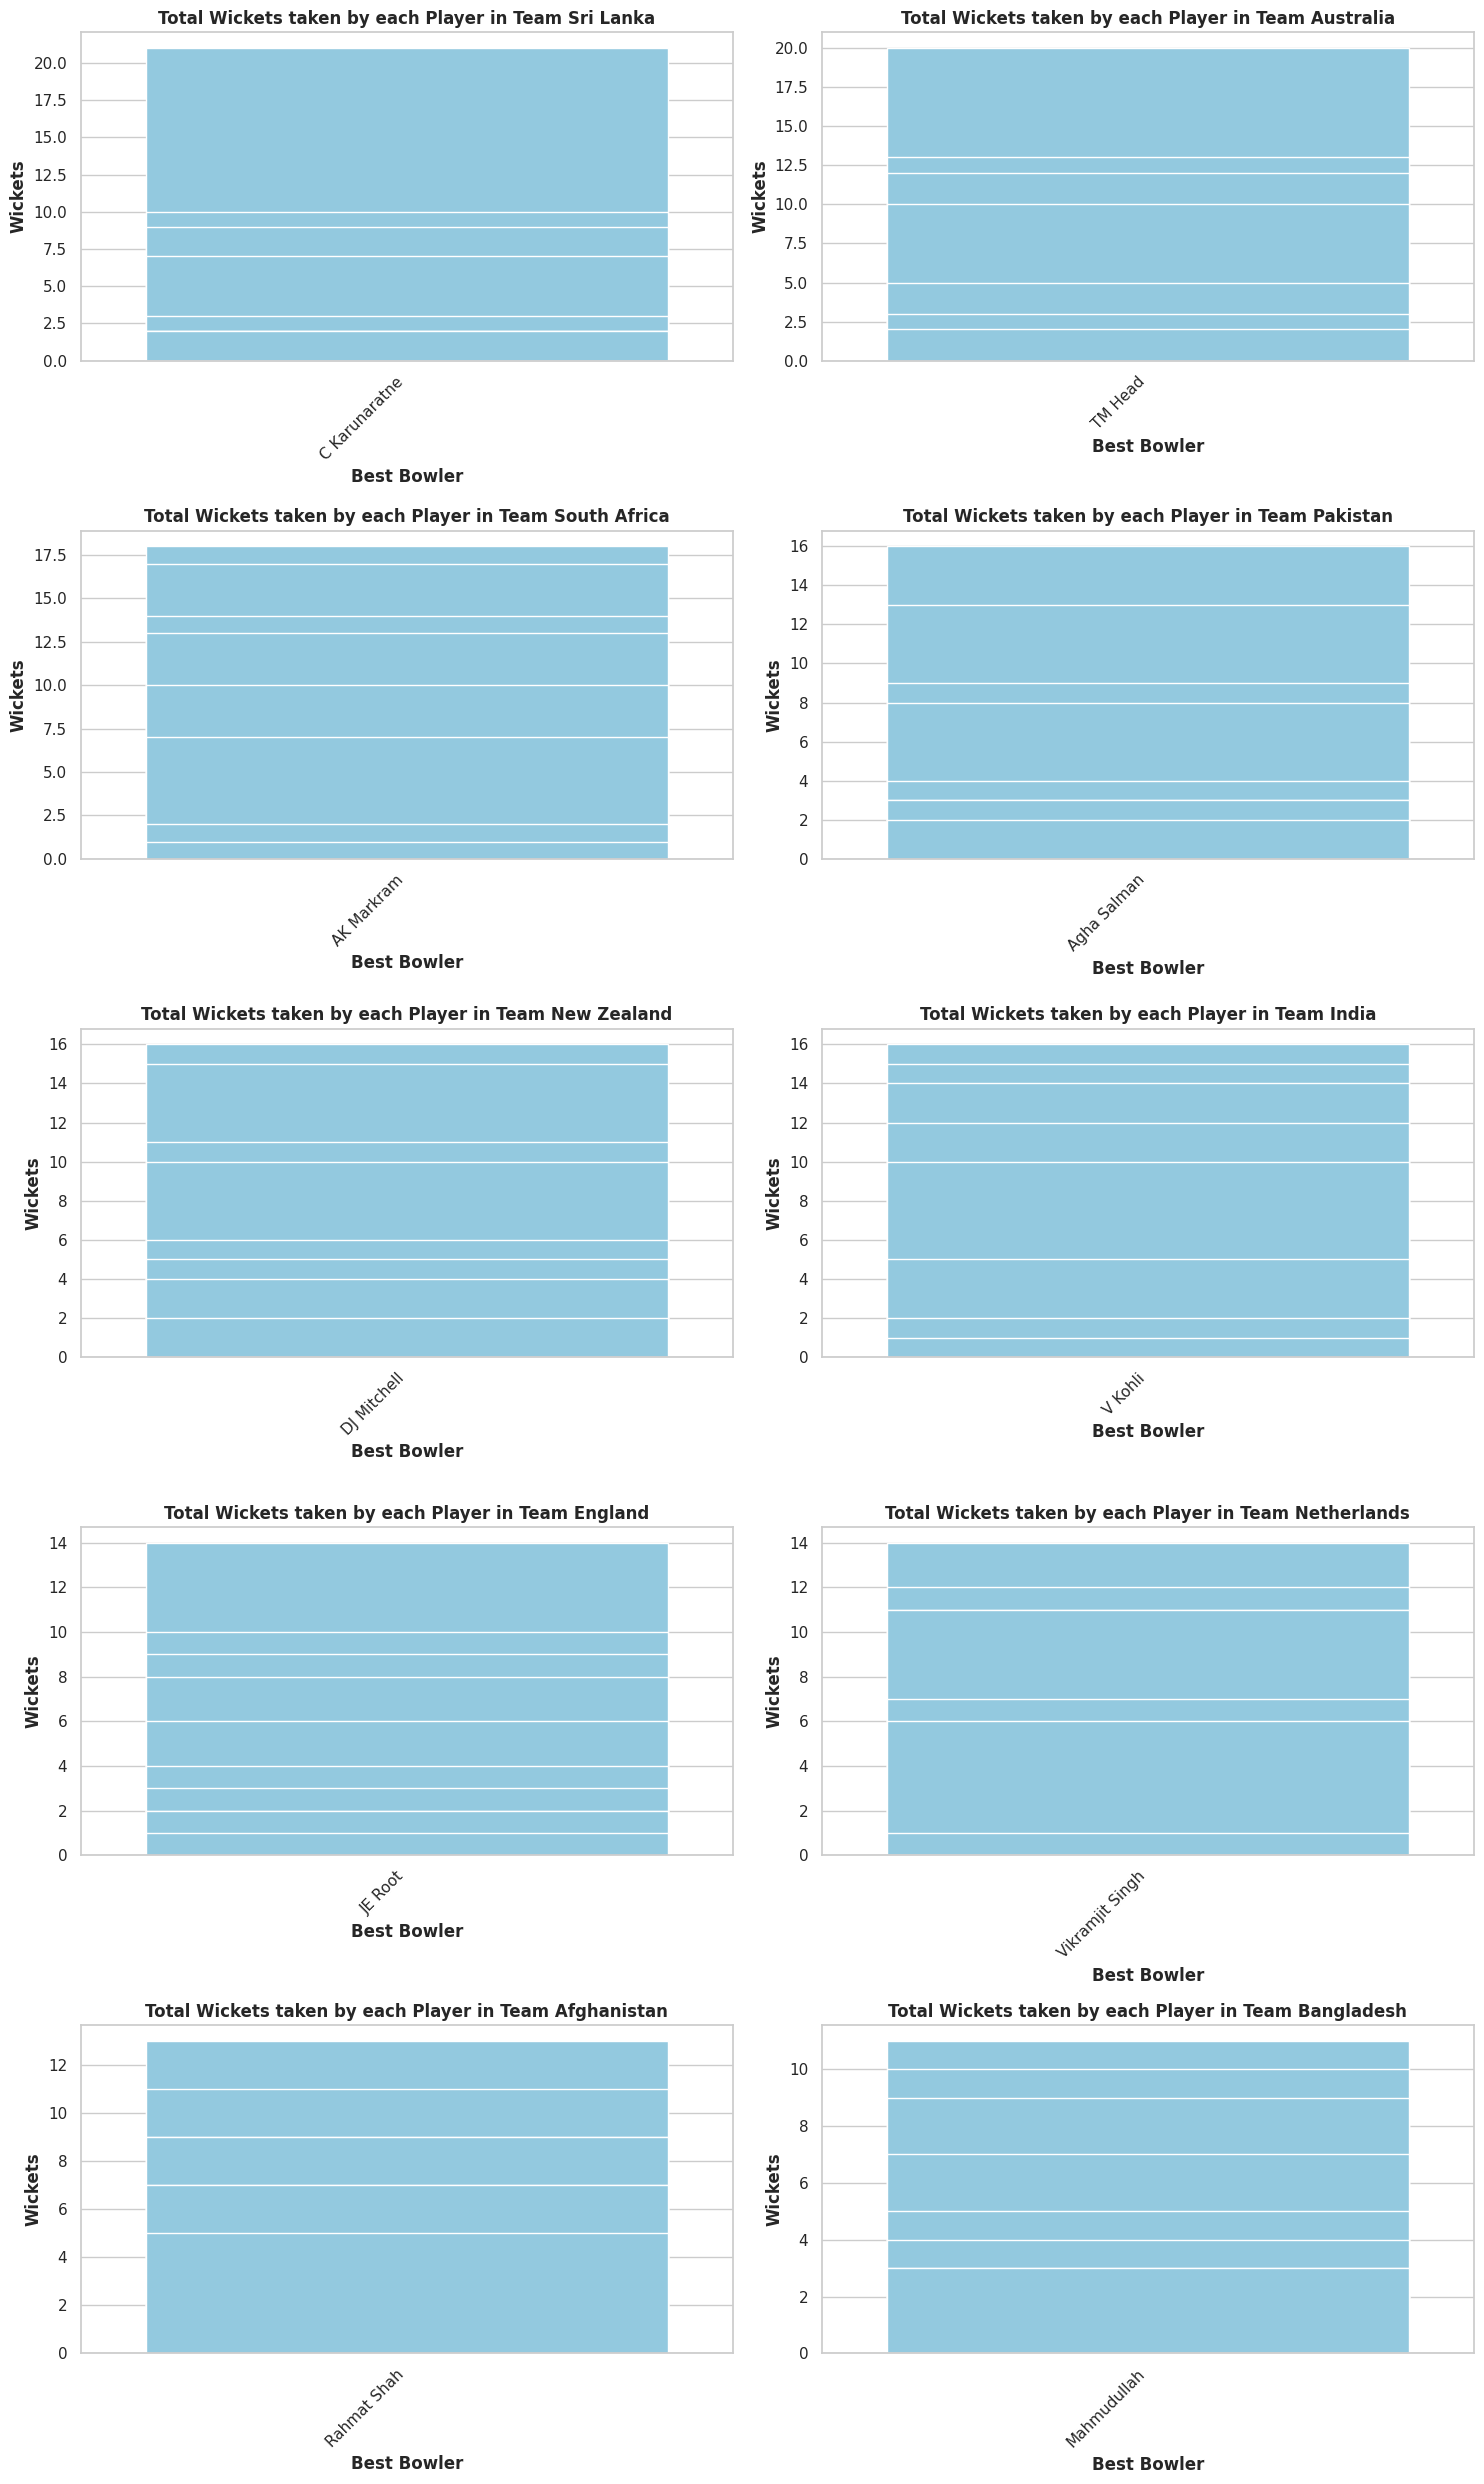

In [45]:
sns.set(style="whitegrid")

num_rows = len(team_players) // 2
num_cols = 2

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
ax = ax.ravel()

for i, team in enumerate(team_players):
    team_players_data = df[df['team'] == team]
    plt.sca(ax[i])

    # print(f"{team}: {team_players[team]}")
    for player in team_players[team]:
        player_data = team_players_data[team_players_data['Name'] == player]
        total_wickets = player_data['wickets'].sum()
        sns.barplot(x=[player], y=[total_wickets], color='skyblue')

    plt.xlabel('Best Bowler', weight='bold')
    plt.ylabel('Wickets', weight='bold')
    plt.title(f'Total Wickets taken by each Player in Team {team}', weight='bold')


    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [46]:
# Sum of wickets for each player
df = df.sort_values(by=['innings','balls','wickets','economy'])
df['all_wickets'] = df.groupby(['Name', 'innings'])['wickets'].cumsum()

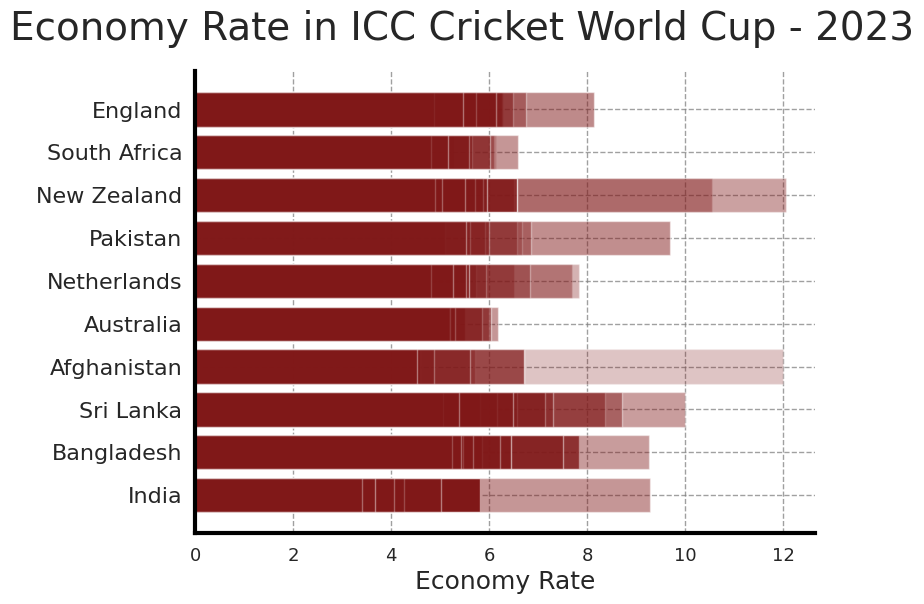

In [47]:
from sklearn.preprocessing import MinMaxScaler

fig,ax = plt.subplots(figsize=(8,6))

# Setting the grid for axis
ax.set_axisbelow(True)
ax.grid(color='grey',which='major',linestyle='--',alpha=0.75)

# Embellishing the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Normalizing the Economy Rate values
scaler = MinMaxScaler(feature_range=(0.2,1))
# Using the normalized Economy Rate values as alpha values
alphaList = scaler.fit_transform(df['economy'].values.reshape(-1,1)).flatten().tolist()
alphaList.reverse()

# Plotting the horizontal bar graph
for index,row in df.iterrows():
    ax.barh(df['team'][index],df['economy'][index],
            color='#801818',alpha=alphaList[index])


# Setting the fontsize, color and font-style of the tick labels
plt.yticks(fontsize=16)
plt.xticks(fontsize=13)

# Setting the labels and the title
plt.xlabel('Economy Rate',fontsize=18)

plt.title(x=0.43,y=1.05,label='Economy Rate in ICC Cricket World Cup - 2023',
          fontsize=28)

plt.show()

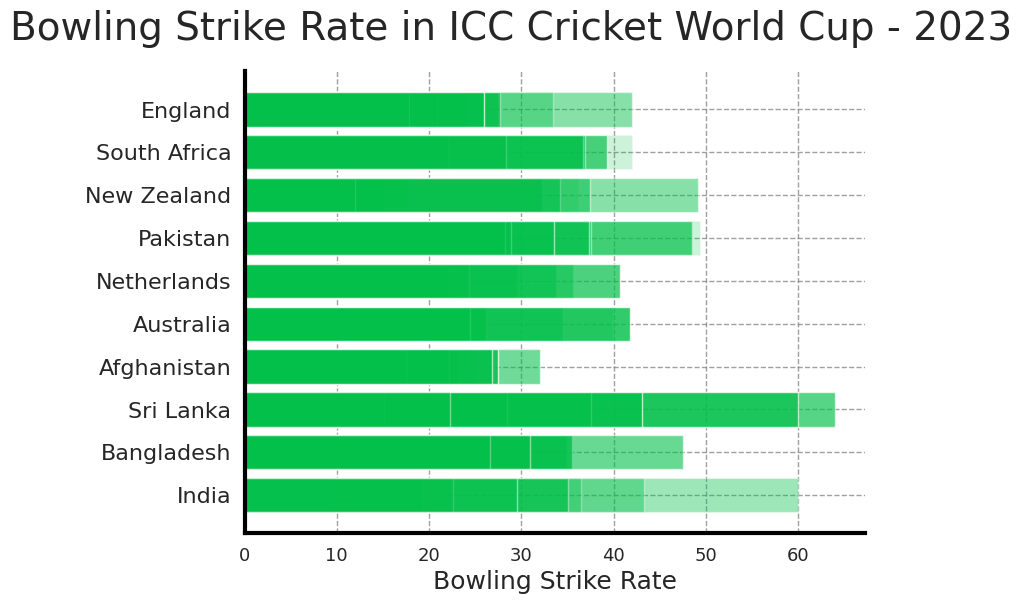

In [48]:
fig,ax = plt.subplots(figsize=(8,6))

# Setting the grid for axis
ax.set_axisbelow(True)
ax.grid(color='grey',which='major',linestyle='--',alpha=0.75)

# Embellishing the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Normalizing the Economy Rate values
scaler = MinMaxScaler(feature_range=(0.2,1))
# Using the normalized Economy Rate values as alpha values
alphaList = scaler.fit_transform(df['strike_rate'].values.reshape(-1,1)).flatten().tolist()
alphaList.reverse()

# Plotting the horizontal bar graph
for index,row in df.iterrows():
    ax.barh(df['team'][index],df['strike_rate'][index],
            color='#03C04A',alpha=alphaList[index])


# Setting the fontsize, color and font-style of the tick labels
plt.yticks(fontsize=16)
plt.xticks(fontsize=13)

# Setting the labels and the title
plt.xlabel('Bowling Strike Rate',fontsize=18)

plt.title(x=0.43,y=1.05,label='Bowling Strike Rate in ICC Cricket World Cup - 2023',
          fontsize=28)

plt.show()

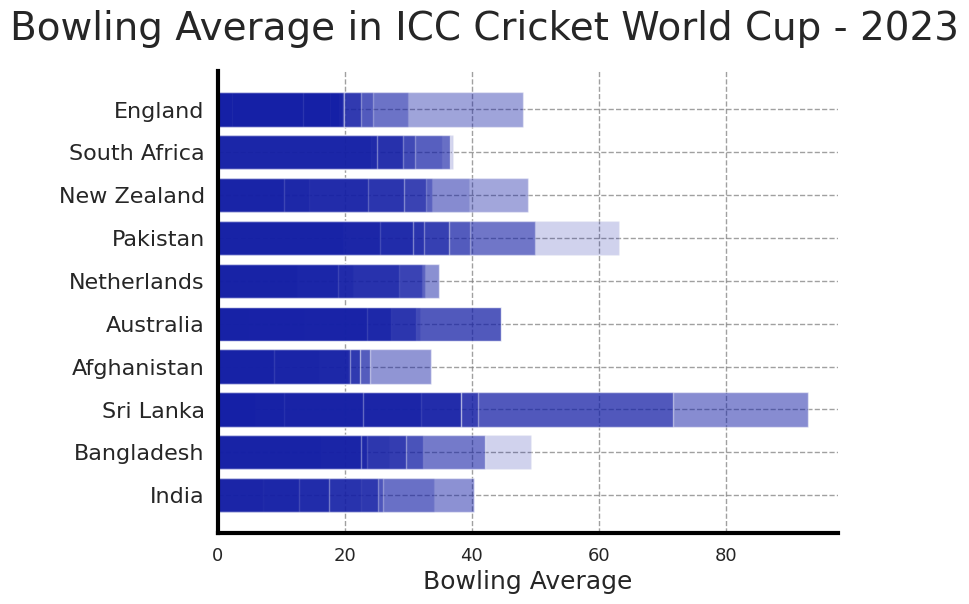

In [49]:
fig,ax = plt.subplots(figsize=(8,6))

# Setting the grid for axis
ax.set_axisbelow(True)
ax.grid(color='grey',which='major',linestyle='--',alpha=0.75)

# Embellishing the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Normalizing the Economy Rate values
scaler = MinMaxScaler(feature_range=(0.2,1))
# Using the normalized Economy Rate values as alpha values
alphaList = scaler.fit_transform(df['average'].values.reshape(-1,1)).flatten().tolist()
alphaList.reverse()

# Plotting the horizontal bar graph
for index,row in df.iterrows():
    ax.barh(df['team'][index],df['average'][index],
            color='#1520A6',alpha=alphaList[index])


# Setting the fontsize, color and font-style of the tick labels
plt.yticks(fontsize=16)
plt.xticks(fontsize=13)

# Setting the labels and the title
plt.xlabel('Bowling Average',fontsize=18)

plt.title(x=0.43,y=1.05,label='Bowling Average in ICC Cricket World Cup - 2023',
          fontsize=28)

plt.show()

It is self-understandable that, as there are only a few matches left in the world cup, there are very high chances that only those players who has most wickets till now, only one of them can be the batsman with most wickets.

So, making the list of batsman who has wickets more than 10.

Also, only India, Australia, New Zealand, and South Africa will be in the semi-final. So, bowlers belonging to this team, can gain addtional wickets, other then this team, there are no chances that there batsmen will score more than that they currently have.

In [50]:
selected_bowling_table = df.groupby('Name').filter(lambda x: x['wickets'].sum() >= 10 and any(team in ['India', 'New Zealand', 'Australia', 'South Africa'] for team in x['team']))
selected_bowling_table2 = selected_bowling_table.groupby('Name')['wickets'].sum().reset_index()

print(selected_bowling_table2)

              Name  wickets
0          A Zampa       20
1        G Coetzee       18
2        JJ Bumrah       15
3     JR Hazlewood       13
4         K Rabada       13
5       KA Maharaj       14
6    Kuldeep Yadav       12
7          L Ngidi       10
8      LH Ferguson       10
9         M Jansen       17
10        MA Starc       12
11        MJ Henry       11
12      MJ Santner       16
13  Mohammed Shami       16
14  Mohammed Siraj       10
15      PJ Cummins       10
16       RA Jadeja       14
17        TA Boult       15


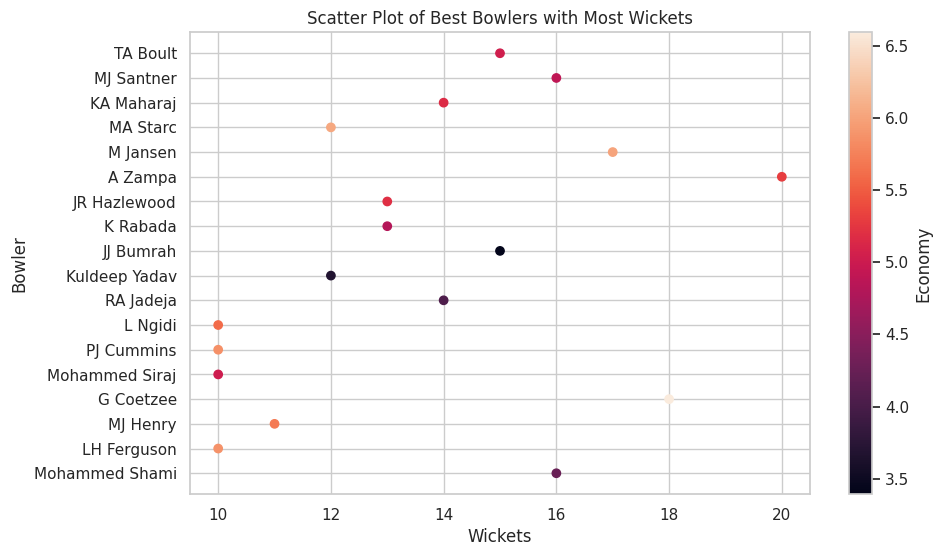

In [51]:
df2 = df[['Name','team','wickets','economy','strike_rate']]
df2 = df2.groupby('Name').filter(lambda x: x['wickets'].sum() >= 10 and any(team in ['India', 'New Zealand', 'Australia', 'South Africa'] for team in x['team']))

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df2['wickets'], df2['Name'], c=df2['economy'])

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Economy')

# Labels and title
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.title('Scatter Plot of Best Bowlers with Most Wickets')

# Show the plot
plt.show()

From this graph, we can see that these will be top 5 wicket takers from these set of bowlers.

# 3. Preprocessing

In [52]:
date_format = '%d-%m-%Y'
new_df['date'] = pd.to_datetime(new_df['date'], format=date_format)

In [53]:
new_df = new_df.sort_values(by=['date'])
new_df.head()

,date,name,team,average,strike_rate,economy,wickets
0,2023-10-05,TA Boult,New Zealand,29.264550,37.444444,5.031440,1
11,2023-10-05,LS Livingstone,England,19.777778,27.666667,6.147222,0
10,2023-10-05,AU Rashid,England,19.901042,25.986979,5.472516,0
8,2023-10-05,MA Wood,England,24.500000,33.452381,6.748263,0
7,2023-10-05,SM Curran,England,48.000000,42.000000,8.142581,1


In [54]:
bowler_decoded = new_df['name']
teams_decoded = new_df['team']

In [55]:
selected_bowler_df = new_df.groupby('name').filter(lambda x: any(bowler in selected_bowlers_list for bowler in x['name']))
selected_bowler_df.head()

,date,name,team,average,strike_rate,economy,wickets
0,2023-10-05,TA Boult,New Zealand,29.264550,37.444444,5.031440,1
2,2023-10-05,MJ Santner,New Zealand,23.711111,34.246914,4.899798,2
1,2023-10-05,MJ Henry,New Zealand,32.722222,32.250000,5.702410,3
46,2023-10-07,K Rabada,South Africa,29.104167,36.708333,4.817650,2
45,2023-10-07,M Jansen,South Africa,30.979167,28.354167,6.015438,2


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
def transform_cols(x):
    le = LabelEncoder()
    x_encoded = le.fit_transform(x) + 1
    return x_encoded, le

In [58]:
encoders = {}
encode_cols = ['name', 'team']

for col in encode_cols:
    new_df[col], encoders[col] = transform_cols(new_df[col])

In [59]:
bowler_encoded = new_df['name']
teams_encoded = new_df['team']

In [60]:
bowler_map = {}

bowler_map = {decoded: encoded for decoded, encoded in zip(bowler_decoded, bowler_encoded) if decoded in selected_bowlers_list}

bowler_map

{'TA Boult': 91,
 'MJ Santner': 53,
 'MJ Henry': 52,
 'K Rabada': 36,
 'M Jansen': 45,
 'KA Maharaj': 37,
 'G Coetzee': 23,
 'L Ngidi': 40,
 'JR Hazlewood': 35,
 'A Zampa': 2,
 'PJ Cummins': 72,
 'MA Starc': 48,
 'Kuldeep Yadav': 39,
 'Mohammed Siraj': 64,
 'JJ Bumrah': 34,
 'RA Jadeja': 77,
 'LH Ferguson': 42,
 'Mohammed Shami': 63}

In [61]:
teams_map = {}
teams_map = {decoded: encoded for decoded, encoded in zip(teams_decoded, teams_encoded) if decoded in selected_teams}
teams_map

{'New Zealand': 7, 'South Africa': 9, 'Australia': 2, 'India': 5}

In [62]:
new_df.shape

(516, 7)

In [63]:
selected_bowler_df.drop('date', axis=1, inplace=True)
new_df.drop('date', axis=1, inplace=True)

In [64]:
selected_bowler_df.sort_values(by='name', inplace=True)
new_df
new_df.sample(5)

,name,team,average,strike_rate,economy,wickets
399,81,1,21.736111,27.145833,4.905018,0
482,24,7,10.388889,11.944444,5.824900,0
101,26,5,28.000000,18.000000,9.333333,2
306,90,9,19.000000,23.500000,4.851064,4
262,96,8,82.000000,56.000000,8.785714,0


In [65]:
selected_bowler_df['name'] = selected_bowler_df['name'].map(bowler_map)
selected_bowler_df['team'] = selected_bowler_df['team'].map(teams_map)

In [66]:
selected_bowler_df.sort_values(by='name', inplace=True)
selected_bowler_df

,name,team,average,strike_rate,economy,wickets
115,2,2,0.000000,0.000000,6.625000,1
501,2,2,23.437500,24.489580,5.296086,2
163,2,2,35.000000,30.500000,6.755123,4
60,2,2,23.437500,24.489583,5.296086,0
457,2,2,18.500000,19.130952,5.250826,1
...,...,...,...,...,...,...
68,91,7,48.000000,61.000000,4.721311,1
314,91,7,28.800000,38.700000,4.338475,3
413,91,7,31.380952,39.500000,4.837774,0
372,91,7,28.277778,35.750000,4.837618,1


# 5. Modelling

It is confirmed that, the Semi-Finale will matches will happen between India vs. New Zealand and South Africa vs. Australia.

As per the prediction in task-2, the Finale will happen between India and South Africa.

We are going to predict the wickets for bowler in these 4 teams, from my selected_bowler list for Semi-Finale and Finale, using RNN and LSTM model.

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
# Normalizing numeric columns
scaler = MinMaxScaler()
new_df[['wickets', 'average', 'economy', 'strike_rate']] = scaler.fit_transform(new_df[['wickets', 'average', 'economy', 'strike_rate']])

In [69]:
# Creating sequence length for LSTM
sequence_length = 3
X, y = [], []

for i in range(len(new_df) - sequence_length):
    X.append(new_df.iloc[i:i+sequence_length, :-1])
    y.append(new_df.iloc[i+sequence_length-1, -1])

X, y = np.array(X), np.array(y)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
model = Sequential()
model.add(LSTM(units=150, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

In [74]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [76]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [77]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
13/13 [==============================] - 7s 131ms/step - loss: 0.1773 - val_loss: 0.0765
Epoch 2/20
13/13 [==============================] - 0s 29ms/step - loss: 0.0910 - val_loss: 0.0626
Epoch 3/20
13/13 [==============================] - 1s 50ms/step - loss: 0.0629 - val_loss: 0.0626
Epoch 4/20
13/13 [==============================] - 1s 45ms/step - loss: 0.0634 - val_loss: 0.0549
Epoch 5/20
13/13 [==============================] - 0s 22ms/step - loss: 0.0483 - val_loss: 0.0567
Epoch 6/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0447 - val_loss: 0.0494
Epoch 7/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0432 - val_loss: 0.0578
Epoch 8/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0443 - val_loss: 0.0476
Epoch 9/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0417 - val_loss: 0.0498
Epoch 10/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0415 - val_loss: 0.0551
Epoch 11

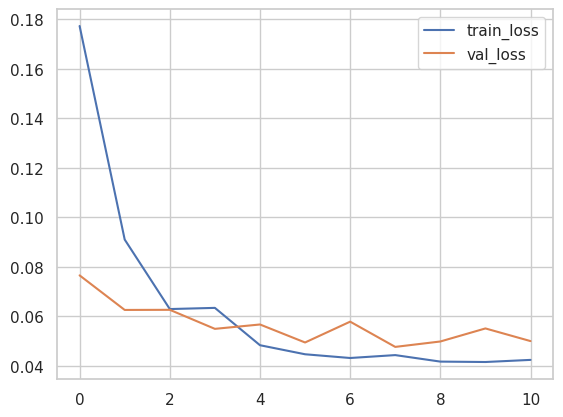

In [78]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Now, using this trained model to predict the wickets for selected bowler

In [79]:
selected_bowler_encoded = selected_bowler_df['name'].unique()
print(f"selected_bowler_encoded: {selected_bowler_encoded}")
selected_team_encoded = selected_bowler_df['team'].unique()
print(f"selected_team_encoded: {selected_team_encoded}")

selected_bowler_encoded: [ 2 23 34 35 36 37 39 40 42 45 48 52 53 63 64 72 77 91]
selected_team_encoded: [2 9 5 7]


In [80]:
# Function to predict wickets for bowler
def predict_wickets_for_bowler(model, selected_bowler_df, scaler, sequence_length):
    selected_sequences = []
    for bowler in selected_bowler_df['name'].unique().tolist():
        bowler_data = selected_bowler_df[selected_bowler_df['name'] == bowler]
        bowler_data = bowler_data.copy()
        bowler_sequence = bowler_data.iloc[-sequence_length:, :-1].values  # Assuming the same features as the model input

        predicted_wickets = model.predict(np.array([bowler_sequence]))

        avg_values = bowler_data.mean()
        # Not Out	Out	Batsman	Team	Balls_Played	Strike_Rate	Total_Runs
        predicted_row = pd.DataFrame({
            'name': [bowler],
            'team': [int(avg_values['team'])],
            'average': [avg_values['average']],
            'strike_rate': [avg_values['strike_rate']],
            'economy':[avg_values['economy']],
            'wickets': int(predicted_wickets[0]),
        })

        print(predicted_row)
        selected_bowler_df = pd.concat([selected_bowler_df, predicted_row], ignore_index=True)

    selected_bowler_df.sort_values(by='name', inplace=True)

    return selected_bowler_df

In [81]:
predicted_df_initial = predict_wickets_for_bowler(model, selected_bowler_df, scaler, sequence_length)

1/1 [==============================] - 0s 193ms/step
   name  team    average  strike_rate   economy  wickets
0     2     2  21.262346    20.313624  5.884781        2
1/1 [==============================] - 0s 21ms/step
   name  team    average  strike_rate   economy  wickets
0    23     9  28.896825    24.477438  7.216826        3
1/1 [==============================] - 0s 22ms/step
   name  team    average  strike_rate   economy  wickets
0    34     5  16.819621    28.178858  3.510977        2
1/1 [==============================] - 0s 23ms/step
   name  team    average  strike_rate   economy  wickets
0    35     2  32.403571    35.245899  5.100789        3
1/1 [==============================] - 0s 24ms/step
   name  team    average  strike_rate   economy  wickets
0    36     9  24.726265    27.822619  5.290163        2
1/1 [==============================] - 0s 25ms/step
   name  team    average  strike_rate   economy  wickets
0    37     9  27.201257    35.242218  5.553384        3
1/1

In [82]:
predicted_df_initial

,name,team,average,strike_rate,economy,wickets
0,2,2,0.000000,0.000000,6.625000,1
8,2,2,20.361111,18.875000,5.771125,3
7,2,2,27.250000,24.500000,6.383415,4
6,2,2,23.875000,22.187500,6.140020,4
5,2,2,19.500000,18.650000,5.445350,3
...,...,...,...,...,...,...
142,91,7,48.000000,61.000000,4.721311,1
143,91,7,28.800000,38.700000,4.338475,3
144,91,7,31.380952,39.500000,4.837774,0
146,91,7,29.264550,37.444444,5.031440,1


I have predicted the wickets for all the bowlers for their semi-finale matches.
Now, As per the result in task-2, the finale will be between India and South Africa.

So, I am going to predict the score for those bowlers who belong to these teams, from selected_bowlers_list.

In [83]:
finale_teams_decoded = ['India', 'South Africa']
finale_teams_encoded = [5, 9]

In [84]:
finale_bowler_df = predicted_df_initial[predicted_df_initial['team'].isin(finale_teams_encoded)]
finale_bowler_df.head()

,name,team,average,strike_rate,economy,wickets
9,23,9,26.194444,23.138889,6.918108,4
10,23,9,27.333333,23.766667,7.071729,2
11,23,9,24.166667,22.047619,6.593401,3
12,23,9,22.666667,18.333333,7.418182,1
13,23,9,31.666667,25.555556,7.832727,3


In [85]:
finale_bowler_encoded = finale_bowler_df['name'].unique().tolist()
finale_bowler_decoded = [bowler for num in finale_bowler_encoded for bowler, value in bowler_map.items() if value == num]

In [86]:
predicted_df_finale = predict_wickets_for_bowler(model, finale_bowler_df, scaler, sequence_length)

1/1 [==============================] - 0s 23ms/step
   name  team    average  strike_rate   economy  wickets
0    23     9  28.896825    24.477438  7.216826        3
1/1 [==============================] - 0s 23ms/step
   name  team    average  strike_rate   economy  wickets
0    34     5  16.819621    28.178858  3.510977        2
1/1 [==============================] - 0s 22ms/step
   name  team    average  strike_rate   economy  wickets
0    36     9  24.726265    27.822619  5.290163        3
1/1 [==============================] - 0s 25ms/step
   name  team    average  strike_rate   economy  wickets
0    37     9  27.201257    35.242218  5.553384        3
1/1 [==============================] - 0s 20ms/step
   name  team    average  strike_rate   economy  wickets
0    39     5  28.033796    39.381944  4.086942        3
1/1 [==============================] - 0s 23ms/step
   name  team    average  strike_rate   economy  wickets
0    40     9  36.205283    42.167039  5.193494        4
1/1 

In [87]:
predicted_df_finale

,name,team,average,strike_rate,economy,wickets
0,23,9,26.194444,23.138889,6.918108,4
1,23,9,27.333333,23.766667,7.071729,2
2,23,9,24.166667,22.047619,6.593401,3
3,23,9,22.666667,18.333333,7.418182,1
4,23,9,31.666667,25.555556,7.832727,3
...,...,...,...,...,...,...
84,77,5,13.571429,24.339286,4.100455,5
83,77,5,11.000000,20.000000,3.976531,2
82,77,5,15.000000,24.875000,4.083494,1
89,77,5,12.700000,22.646875,4.046231,3


In [88]:
final_df = pd.concat([predicted_df_initial, predicted_df_finale], ignore_index=True).drop_duplicates().reset_index(drop=True)

In [89]:
final_df

,name,team,average,strike_rate,economy,wickets
0,2,2,0.000000,0.000000,6.625000,1
1,2,2,20.361111,18.875000,5.771125,3
2,2,2,27.250000,24.500000,6.383415,4
3,2,2,23.875000,22.187500,6.140020,4
4,2,2,19.500000,18.650000,5.445350,3
...,...,...,...,...,...,...
169,39,5,28.033796,39.381944,4.086942,3
170,45,9,30.212475,26.278100,6.703224,2
171,63,5,11.270348,11.685938,3.767667,1
172,64,5,27.154365,37.659127,5.469577,3


In [90]:
bowler_name_map = {v: k for k, v in bowler_map.items()}
teams_name_map = {v: k for k, v in teams_map.items()}

In [91]:
final_df['name'] = final_df['name'].map(bowler_name_map)
final_df['team'] = final_df['team'].map(teams_name_map)

In [92]:
wickets_by_bowler = final_df.groupby(['name', 'team'])['wickets'].sum().reset_index()

In [93]:
wickets_by_bowler

,name,team,wickets
0,A Zampa,Australia,24
1,G Coetzee,South Africa,24
2,JJ Bumrah,India,21
3,JR Hazlewood,Australia,16
4,K Rabada,South Africa,18
5,KA Maharaj,South Africa,20
6,Kuldeep Yadav,India,21
7,L Ngidi,South Africa,14
8,LH Ferguson,New Zealand,11
9,M Jansen,South Africa,22


Adding D Madushanka manually because Sri Lanka did not qualify for the semifinals.

In [94]:
wickets_by_bowler.loc['18'] = ['D Madushanka','Sri Lanka', 21]

In [95]:
wickets_by_bowler.sort_values(by='wickets', ascending=False, inplace=True)

In [96]:
top_5_bowlers = wickets_by_bowler.head(5)
top_5_bowlers

,name,team,wickets
0,A Zampa,Australia,24
1,G Coetzee,South Africa,24
9,M Jansen,South Africa,22
6,Kuldeep Yadav,India,21
2,JJ Bumrah,India,21


# 6. Conclusion

Considering semi final match scores for (South Africa, Australia) and (India, New Zealand) and final match between India and South Africa players, we got the top five wicket takers of the tournament.